In [1]:
import tensorflow as tf

### TF연산에 사용할 그래프를 생성

H(x) = Wx + b, W와 b의 값은 랜덤하게 설정

tf.random_normal의 인자값은 Shape를 의미함

In [2]:
# x 와 y 데이터
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
# Our hypothesis XW+b
hypothesis = x_train * W + b

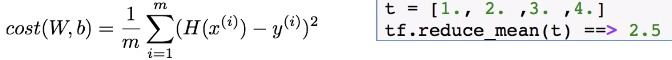

In [3]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

### Gradient Descent

In [4]:
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

### 그래프의 실행 및 갱신과 결과 얻기

In [5]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes gloabl variables in the graph.
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(3001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 1.14078 [ 0.0802927] [ 1.07989621]
20 0.209889 [ 0.4430944] [ 1.16972828]
40 0.183134 [ 0.499697] [ 1.12814164]
60 0.166257 [ 0.52610689] [ 1.07639802]
80 0.150997 [ 0.54865384] [ 1.02593255]
100 0.137138 [ 0.56989175] [ 0.97772914]
120 0.124551 [ 0.5901078] [ 0.93178058]
140 0.113119 [ 0.60937148] [ 0.88799047]
160 0.102737 [ 0.62772959] [ 0.84625822]
180 0.093307 [ 0.64522493] [ 0.8064872]
200 0.0847429 [ 0.66189802] [ 0.76858521]
220 0.0769649 [ 0.6777876] [ 0.73246455]
240 0.0699007 [ 0.69293034] [ 0.69804144]
260 0.063485 [ 0.70736146] [ 0.66523618]
280 0.0576581 [ 0.7211144] [ 0.63397253]
300 0.052366 [ 0.73422098] [ 0.60417819]
320 0.0475597 [ 0.74671161] [ 0.57578397]
340 0.0431944 [ 0.75861531] [ 0.54872417]
360 0.0392298 [ 0.76995957] [ 0.52293605]
380 0.0356292 [ 0.78077054] [ 0.49836001]
400 0.032359 [ 0.7910735] [ 0.47493893]
420 0.0293889 [ 0.80089229] [ 0.45261854]
440 0.0266915 [ 0.81024963] [ 0.43134713]
460 0.0242417 [ 0.8191672] [ 0.41107544]
480 0.0220167 [ 0.8276

### Placeholders를 이용한 데이터 입력

placeholder의 shape 인자는 차원 수를 뜻함

In [6]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis XW+b
hypothesis = X * W + b
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
#Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variabels in the graph.
sess.run(tf.global_variables_initializer())

#Fit the line with new trainin data
for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
        feed_dict={X: [1, 2, 3, 4, 5], Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)
        
# Testing our model
print(sess.run(hypothesis, feed_dict={X:[5]}))
print(sess.run(hypothesis, feed_dict={X:[2.5]}))
print(sess.run(hypothesis, feed_dict={X:[1.5, 3.5]}))

# Do open test
print(sess.run(hypothesis, feed_dict={X:[10]}))

0 75.7483 [-1.15602148] [-0.58371311]
20 0.163408 [ 1.25020158] [ 0.15392976]
40 0.14136 [ 1.24404621] [ 0.21872234]
60 0.12345 [ 1.2281096] [ 0.27645069]
80 0.10781 [ 1.21317089] [ 0.3303856]
100 0.0941514 [ 1.19921017] [ 0.38078821]
120 0.0822231 [ 1.18616366] [ 0.42788988]
140 0.0718061 [ 1.17397165] [ 0.47190693]
160 0.0627088 [ 1.16257799] [ 0.51304126]
180 0.054764 [ 1.15193081] [ 0.5514816]
200 0.0478258 [ 1.14198065] [ 0.58740473]
220 0.0417666 [ 1.1326822] [ 0.62097502]
240 0.0364751 [ 1.1239928] [ 0.65234667]
260 0.031854 [ 1.11587238] [ 0.68166399]
280 0.0278183 [ 1.10828376] [ 0.70906103]
300 0.0242939 [ 1.10119212] [ 0.7346639]
320 0.0212161 [ 1.09456503] [ 0.75859016]
340 0.0185281 [ 1.08837187] [ 0.78094935]
360 0.0161808 [ 1.0825845] [ 0.80184418]
380 0.0141308 [ 1.07717586] [ 0.82137054]
400 0.0123405 [ 1.07212162] [ 0.83961815]
420 0.0107771 [ 1.06739819] [ 0.8566708]
440 0.00941172 [ 1.06298435] [ 0.87260664]
460 0.00821931 [ 1.05885935] [ 0.88749886]
480 0.00717799 